<a href="https://colab.research.google.com/github/rmclino/pytorch/blob/master/PerceptronLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [0]:
n_pts = 100
centers = [[-0.5,0.5],[ 0.5,-0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers = centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

In [0]:
def scatter_plot():
  plt.scatter(X[ y==0,0], X[ y==0,1], color='b')
  plt.scatter(X[ y==1,0], X[ y==1,1], color='green')
  plt.show()

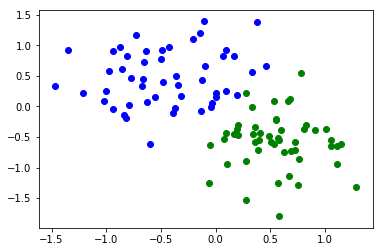

In [42]:
scatter_plot()

In [5]:
X[y==0,0]

array([-0.13715792, -0.60224775,  0.0063745 , -0.87433355, -0.6340043 ,
       -0.48180397,  0.19748489, -0.62590326, -0.31262435, -0.1085056 ,
        0.09825765, -0.36456438,  0.33484534, -0.66134642, -0.42758595,
       -0.09837844,  0.45694611, -0.12901503, -0.49886163, -0.03991778,
       -0.20505257, -0.97932046, -0.79298479, -1.00155227, -0.83500669,
        0.164381  ,  0.00209495,  0.38237203, -0.14371744, -0.34823976,
       -0.77155446, -1.01763413, -0.82214661, -0.03511838, -0.93382716,
       -0.3868086 , -1.20861324, -0.48812671, -0.67759278, -0.3742912 ,
       -0.65635992, -0.80908349,  0.06691962, -0.55602749, -0.7314401 ,
       -0.93425224, -1.4706717 ,  0.09655585, -0.85181454, -1.34924014])

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    #pred = 1 / (1 + math.exp(-x))
    return pred
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0
      

In [60]:
torch.manual_seed(2)
model = Model(2,1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
 tensor([0.1939], requires_grad=True)]

In [61]:
[w,b] = model.parameters()
w1,w2 = w.view(2)
b1 = b[0]
print(w1.item(), w2.item(), b1.item())

0.16220331192016602 -0.1682732105255127 0.19390898942947388


In [0]:
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0,2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1,x2,'r')
  scatter_plot()

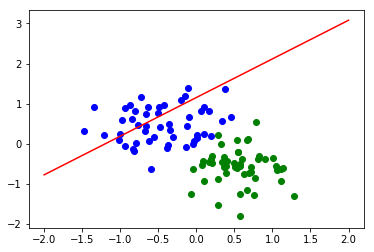

In [64]:
plot_fit('Initial_Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
def model_fit(model, epochs=1000,min_error=0.01):
  epochs = epochs
  losses = []
  for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    
    if i % 10 == 0:
      print('epoch:',i,'loss',loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if loss.item()<=min_error:
      return (epochs,losses)
      
  return (epochs,losses)
  
  

In [67]:
epochs,losses = model_fit(model)

epoch: 0 loss 0.6185115575790405
epoch: 10 loss 0.6081910729408264
epoch: 20 loss 0.5982059240341187
epoch: 30 loss 0.588543713092804
epoch: 40 loss 0.5791923403739929
epoch: 50 loss 0.5701398849487305
epoch: 60 loss 0.5613755583763123
epoch: 70 loss 0.5528878569602966
epoch: 80 loss 0.5446667671203613
epoch: 90 loss 0.5367016792297363
epoch: 100 loss 0.5289824604988098
epoch: 110 loss 0.5215004682540894
epoch: 120 loss 0.5142462253570557
epoch: 130 loss 0.5072106122970581
epoch: 140 loss 0.5003856420516968
epoch: 150 loss 0.4937628209590912
epoch: 160 loss 0.487334668636322
epoch: 170 loss 0.48109352588653564
epoch: 180 loss 0.4750322997570038
epoch: 190 loss 0.46914422512054443
epoch: 200 loss 0.46342262625694275
epoch: 210 loss 0.45786118507385254
epoch: 220 loss 0.4524537920951843
epoch: 230 loss 0.4471950829029083
epoch: 240 loss 0.44207894802093506
epoch: 250 loss 0.43710052967071533
epoch: 260 loss 0.43225470185279846
epoch: 270 loss 0.4275362491607666
epoch: 280 loss 0.42294082

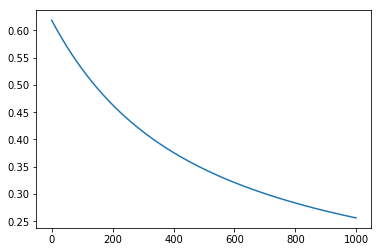

In [68]:
plt.plot(range(epochs),losses)

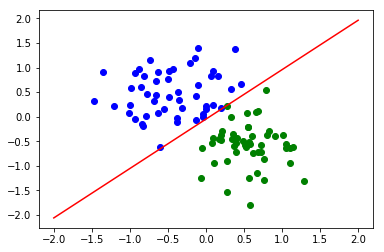

In [69]:
plot_fit('Trained_Model')

Red point Positive Prob = 0.9424158334732056
Black point Positive Prob = 0.05055497586727142
Red point in class 1
Black point in class 0


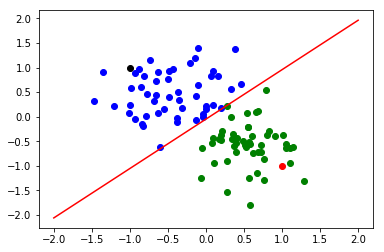

In [70]:
point1 = torch.Tensor([1.0,-1.0])
point2 = torch.Tensor([-1.0,1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1],'ko')
print("Red point Positive Prob = {}".format(model.forward(point1).item()))
print("Black point Positive Prob = {}".format(model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))

plot_fit('Trained_Model')


In [71]:
model.forward(point1).item()

0.9424158334732056

In [72]:
model.forward(point2)

tensor([0.0506], grad_fn=<SigmoidBackward>)